In [1]:
import numpy as np

from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform

num_points = 1000
dimensions = range(2, 11)
fractions_in_hypersphere = []
nn_distance_ratios = []

for d in dimensions:
    points = np.random.uniform(-1, 1, size=(num_points, d))
    
    origin = np.zeros(d)
    distances_to_origin = np.linalg.norm(points - origin, axis=1)
    
    fraction_within_hypersphere = np.sum(distances_to_origin <= 1) / num_points
    fractions_in_hypersphere.append(fraction_within_hypersphere)
    
    pairwise_distances = pdist(points)
    mean_pairwise_distance = np.mean(pairwise_distances)
    
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(points)
    distances, indices = nbrs.kneighbors(points)
    
    nearest_neighbor_distances = distances[:, 1]
    
    mean_nn_distance = np.mean(nearest_neighbor_distances)
    
    nn_distance_ratio = mean_nn_distance / mean_pairwise_distance
    nn_distance_ratios.append(nn_distance_ratio)





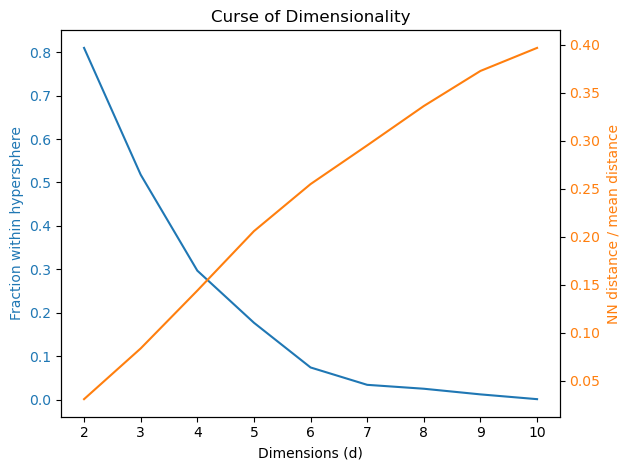

In [2]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

# Plot the fraction of points within the unit hypersphere
ax1.set_xlabel('Dimensions (d)')
ax1.set_ylabel('Fraction within hypersphere', color='tab:blue')
ax1.plot(dimensions, fractions_in_hypersphere, color='tab:blue', label='Fraction in hypersphere')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the nearest-neighbor distance ratio
ax2 = ax1.twinx()
ax2.set_ylabel('NN distance / mean distance', color='tab:orange')
ax2.plot(dimensions, nn_distance_ratios, color='tab:orange', label='NN distance ratio')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Show the plots
plt.title('Curse of Dimensionality')
fig.tight_layout()
plt.show()